In [19]:
import functions as f
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import importlib
importlib.reload(f)

daily_omega = r"C:\\physics_masters\\data\\Bossa public market data\\pub\\daily\\omega\\"


In [32]:
importlib.reload(f)
dataframes = f.load_data_pol(daily_omega)
df_concat = f.concat_dfs_by_date(dataframes, 0.99, smooth_local_volatility=False) #0.99

% of stocks remaining: 12.50%
% of dates remaining: 99.89%
Number of stocks: 50
Number of dates: 3612
% of nans: 0.60%


# Results

<I^2> = 0.1129
rho_0*sigma2_0 = 0.0658


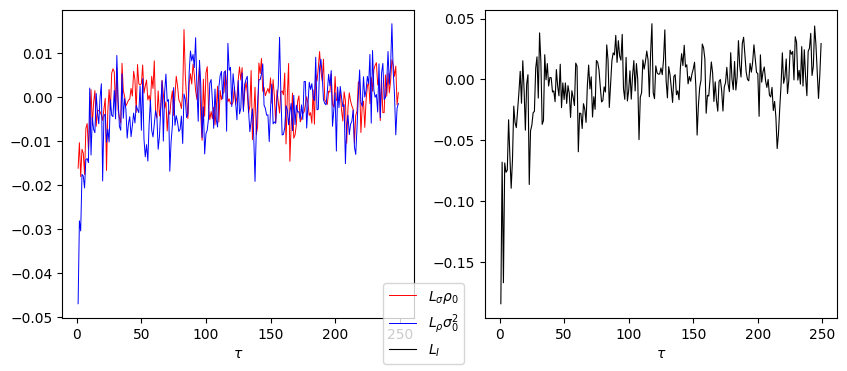

In [33]:
importlib.reload(f)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
data = f.calculate_correlation_functions(df_concat, df_concat.mean(axis=1))

f.plot_correlation_functions(data, fig, ax)

# With real index WIG

% of stocks remaining: 100.00%
% of dates remaining: 100.00%
Number of stocks: 1
Number of dates: 3609
% of nans: 0.25%
<I^2> = 0.9997
rho_0*sigma2_0 = 0.0658


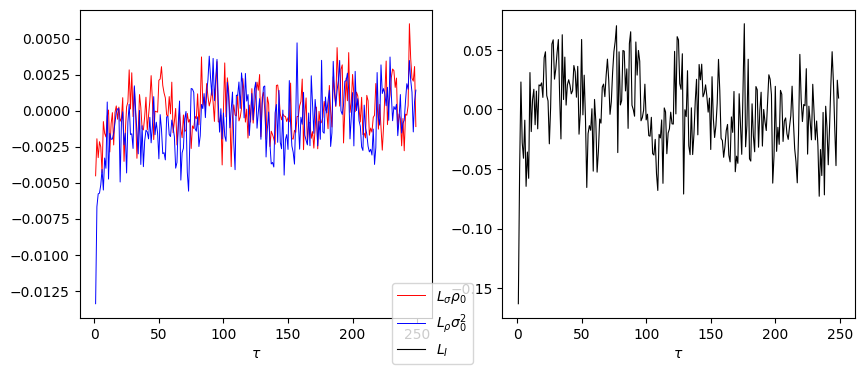

In [34]:
I = pd.read_csv('C:/physics_masters/data/Bossa public market data/pub/daily/omega/WIG.prn', delimiter=',', header=0, parse_dates=['Date'], usecols=['Date', 'Close'])
I.set_index('Date', inplace=True)
I.rename(columns={"Close": 'WIG'}, inplace=True)
I = f.concat_dfs_by_date([I])

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
data = f.calculate_correlation_functions(df_concat, I['WIG'])

f.plot_correlation_functions(data, fig, ax)